# Loan Approval Prediction
### Introduction:

The Loan Approval Prediction project aims to analyze a dataset related to loan applications and approvals to gain insights into the factors influencing loan approval decisions and explore the possibility of making predictions based on the analysis.

### The primary objectives of this project are as follows:

**Univariate Analysis**: To examine each feature individually, studying their distributions and characteristics. This analysis will provide a comprehensive understanding of the dataset and the range of values for each feature.

**Bivariate Analysis**: To explore the relationships between different features and loan approval status. By examining the correlations and associations between variables, we can identify key factors that impact the loan approval decision.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_appr =  pd.read_csv('Loan+Approval+Prediction.csv')
print(loan_appr.head(5))
print('\n')
print(loan_appr.tail(5))
print('\n')
print(loan_appr.info())
print(loan_appr.describe())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [3]:
loan_appr.shape

(614, 13)

We can observe the Dataset has 614 rows and 13 columns

In [4]:
print(loan_appr.columns)
loan_appr.dtypes

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [71]:
print(loan_appr['Gender'].value_counts())
print(loan_appr['Education'].value_counts())
print(loan_appr['Property_Area'].value_counts())
print(loan_appr['Loan_Status'].value_counts())
print(loan_appr['Loan_Amount_Term'].value_counts())
print(loan_appr['Credit_History'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64


We can start by plotting the following individual variables to get a better understanding of loan approval, and it's prediction:
- `'Loan_Status'`: This is the target variable that indicates whether a loan was approved or not. Plotting the distribution of loan approvals ('Y') versus rejections ('N') will provide insights into the overall loan approval rate.

- `'gender'`: Plotting the count or proportion of loan approvals based on gender can help identify any gender-related patterns in loan approval rates.

- `'Education'` : Comparing loan approvals for individuals with different educational backgrounds (graduate or not) can provide insights into the influence of education on loan approval.

- `'married'`: Analyzing loan approvals based on marital status can reveal if being married has any impact on the likelihood of loan approval.

- `'dependents'` : Exploring loan approvals across different levels of dependents will help understand if the number of dependents affects the loan approval decision.

- `'self employed'`: Analyzing loan approvals for self-employed individuals versus those who are not self-employed can highlight any differences in loan approval rates based on employment type.

- `'applicantIncome'` and `'coapplicantIncome'`: Plotting the distribution of applicant and co-applicant incomes can reveal any income-related patterns in loan approvals.

- `'loanAmount'` and `'loanAmountTerm'`: Analyzing the distribution of loan amounts and loan amount terms can provide insights into the typical loan sizes and terms that are being approved.

- `'creditHistory'`: Examining loan approvals based on credit history (with a binary value of 0 or 1) can reveal the impact of creditworthiness on loan approval.

- `'propertyArea'`: Plotting loan approvals based on the property area (urban, semi-urban, or rural) can highlight any regional differences in loan approval rates.

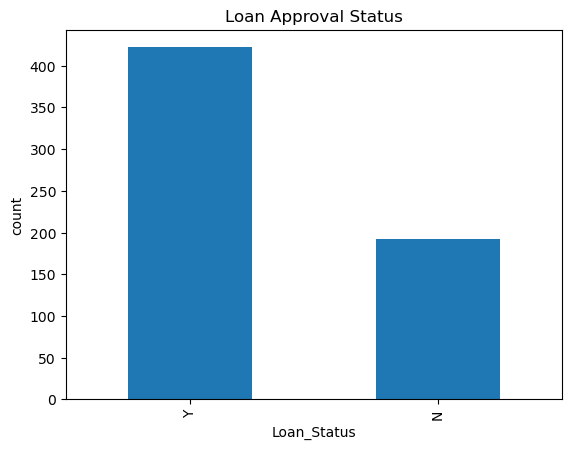

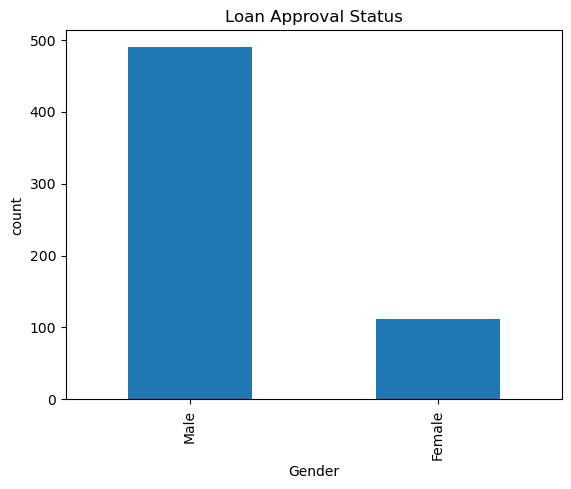

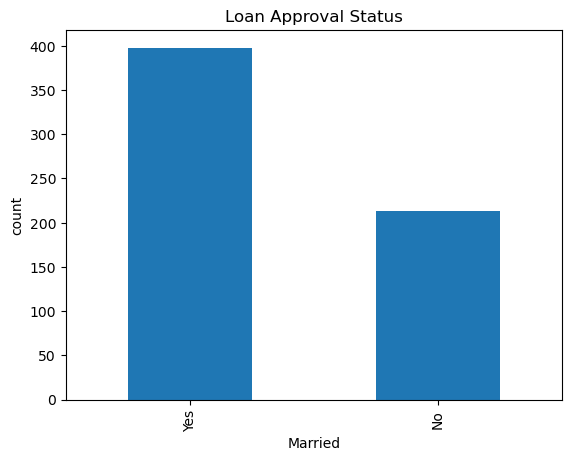

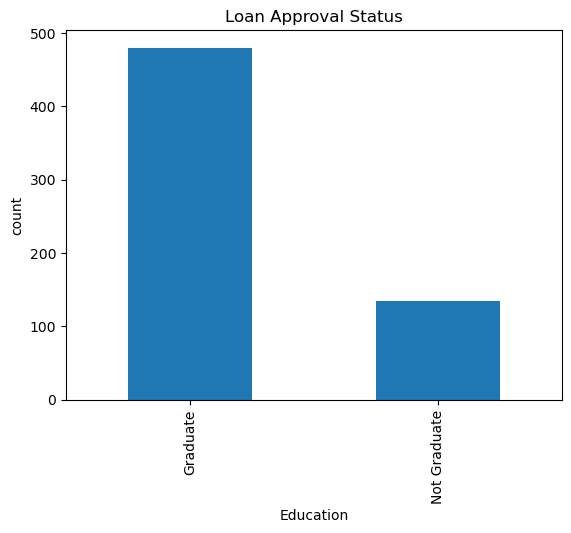

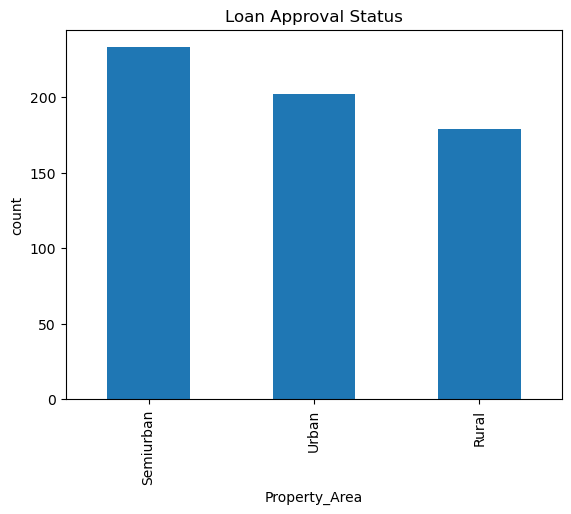

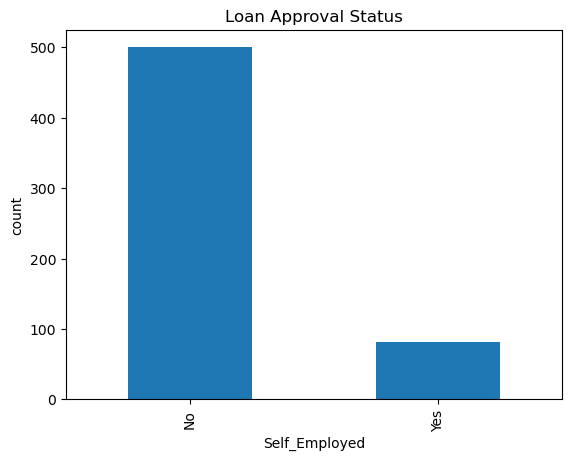

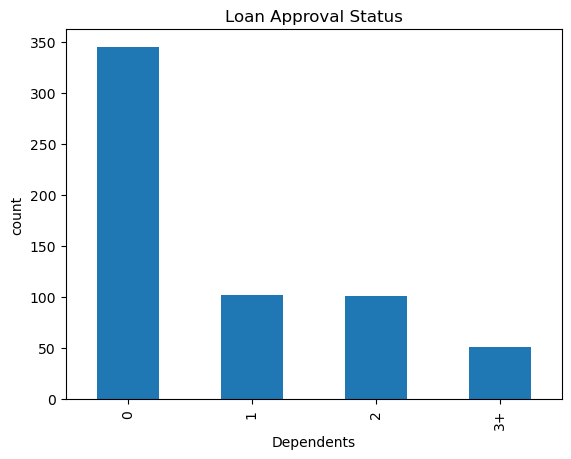

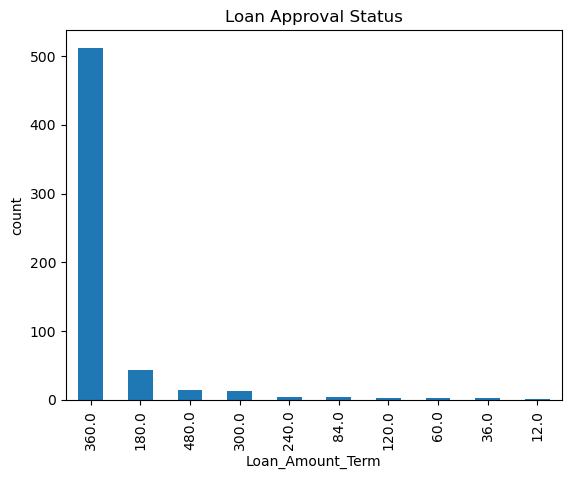

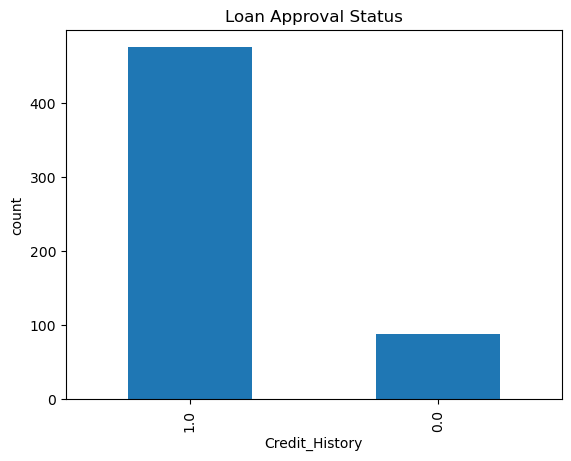

In [6]:
#Sorting Categorical and Numerical columns
categorical = ['Loan_Status', 'Gender', 'Married', 'Education','Property_Area', 'Self_Employed', 'Dependents', 'Loan_Amount_Term', 'Credit_History']

#Plotting all the Categorical columns
for i, column in zip(range(1,10), categorical):
    loan_appr[column].value_counts().plot.bar()
    plt.title('Loan Approval Status')
    plt.xlabel(column)
    plt.ylabel("count")
    plt.show()

Looking at all the bar plots for the categorical columns, we can make some initial analyis, and observe a trend:

- `Loan_Status`: By the bar plot generated by the `Loan_Status` column we can observe that the loan approval rate is greater compared to the loan rejection rate, we can also further explore the factors influencing loan approval, by comparing with other variables and build a loan approval prediction model

- `Gender` : The higher loan approval rate for males in the `Gender` bar plot indicates a potential gender bias in the loan approval process. we can further analyze other variables and compare with gender column to identify potential factors that contribute to the observed difference in loan approval rates.

- `Married` : The bar plot for the `Married` column indicates higher loan appoval rate for the Married marital status, associating being married, with greater financial stability, leading to a postive impact on the loan approval decisions

- `Education`: the bar plot for the `Education` column indicates a higher loan approval rate for educated applicants, suggesting that having a higher level of education has a greater impact on loan approval rate

- `Property Area` : the plot for the `property_area` column showed a almost similar amount of loans approved for all the semiurban, urban and rural areas, suggesting that the property area is not a major factor in loan approval decision.

- `Self_Employed`: the self employed plot indicated a higher number of loan approvals for the salaried applicants. suggesting a preference for the salaried applicants in the loan approval decisions

- `Dependents`: the dependents plot, indicates that having a low number or zero dependents, played a huge impact on the loan approval decsions, with a majority of loan approved for applicants with zero dependents.

- `Credit History`: The Credit history plot indicated that credit history can certainly be considered to be a factor in the loan approval process, with almost 475 out of 564 loans approved for candidates with a credit history

---



## Plotting the Numerical Columns

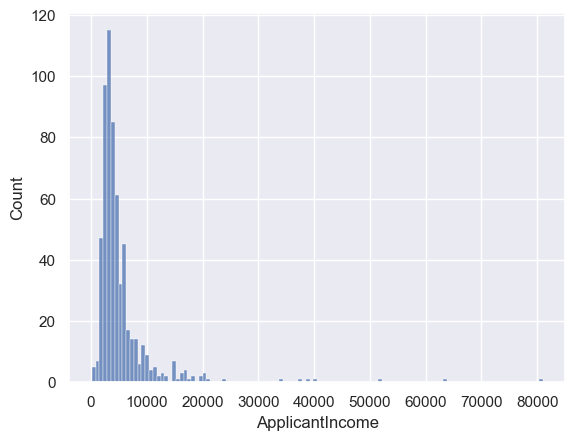

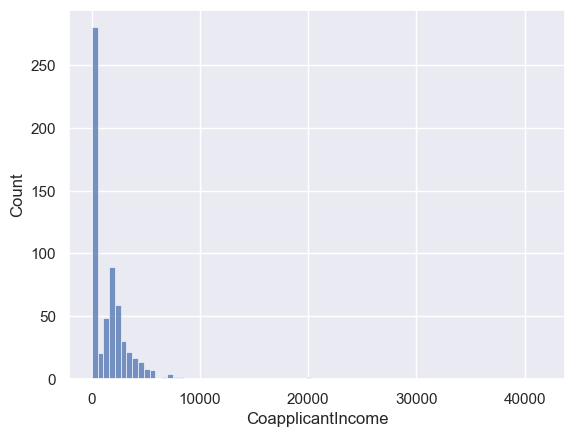

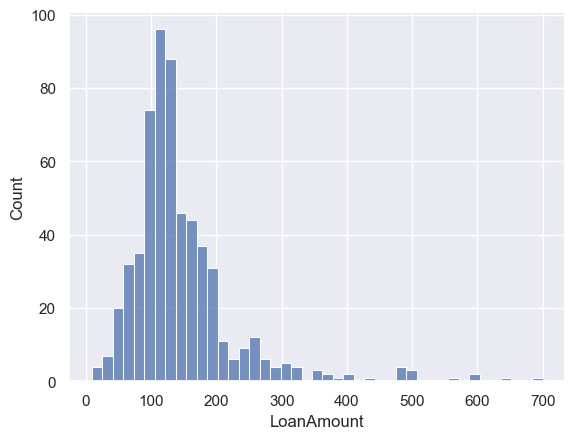

In [7]:
#Sorting Numerical Columns
Numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

sns.set_theme()
#Plotting all the numerical columns
for i, column in zip(range(1,4), Numerical):
    sns.histplot(loan_appr[column])
    plt.show()

Looking at the plot it can be inferred that the distribution of `Applicant Incomes`, is Right-skewed, with majority of applicants, incomes ranging from `0 - 10000`.

We see a similar distribution as that of the applicant income. Majority of `coapplicant’s` income ranges from `0 to 5000`. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

We see a fairly normal distribution which is slightly right-skewed for `LoanAmount`

The Numerical variables can further be plotted as boxplots to check for outliers

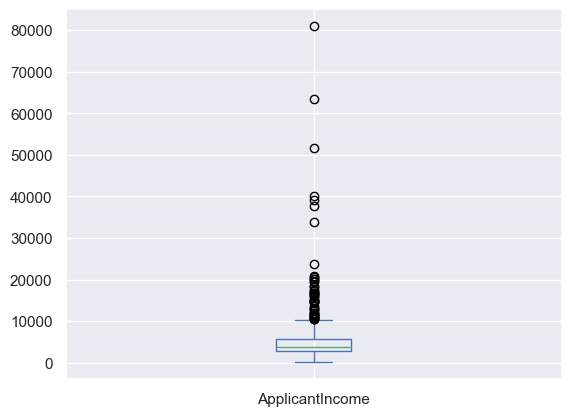

In [8]:
loan_appr['ApplicantIncome'].plot.box()
plt.show()

The boxplot shows the presence of a lot of outliers. which could be due to different education level

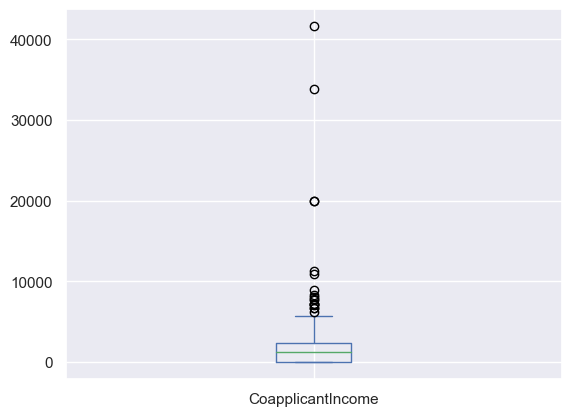

In [9]:
loan_appr['CoapplicantIncome'].plot.box()
plt.show()

Just like `applicant income`, the CoapplicantIncome also has a lot of outliers

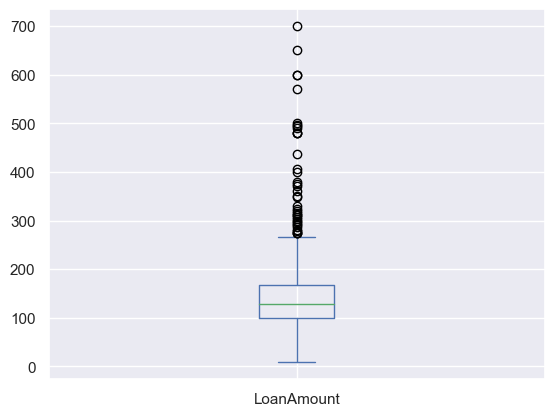

In [10]:
loan_appr['LoanAmount'].plot.box()
plt.show()

**After looking at all the variables individually, let's explore the relationship of these variables with the Loan_Status column, to determine the factors effecting loan approval decisions**

## Categorical Variables vs Loan Status

**Gender vs Loan Status**

In [11]:
pd.crosstab(loan_appr['Gender'], loan_appr['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


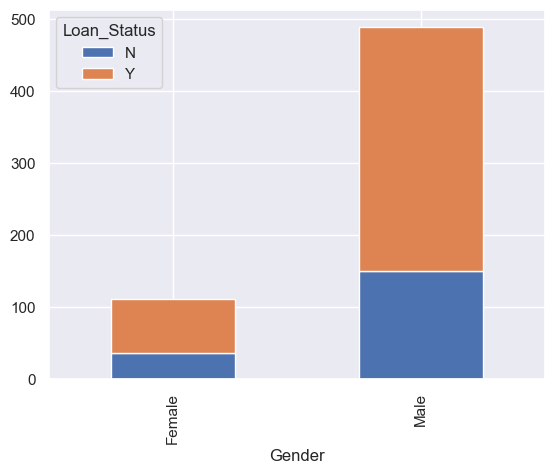

In [12]:
gender_loan_status = pd.crosstab(loan_appr['Gender'], loan_appr['Loan_Status'])
gender_loan_status.plot.bar(stacked = True)
plt.show()

From the bar chart it can be seen that the proportion of loan approval for male and female applicants is more or less same.

**Married vs Loan Status**

In [13]:
pd.crosstab(loan_appr['Married'], loan_appr['Loan_Status'])

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


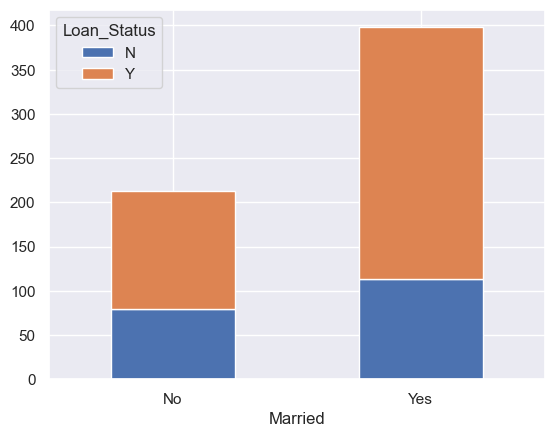

In [14]:
married_loan_status = pd.crosstab(loan_appr['Married'], loan_appr['Loan_Status'])
married_loan_status.plot.bar(stacked = True, rot = 0)
plt.show()

From the bar plot we can see that the proportion of married applicants is higher for the approved loans

In [15]:
pd.crosstab(loan_appr['Education'], loan_appr['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


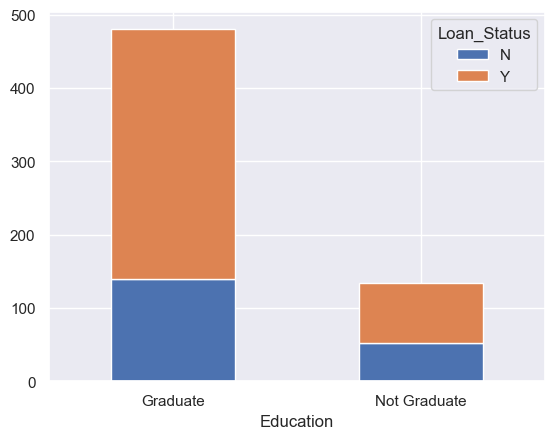

In [16]:
education_loan_status = pd.crosstab(loan_appr['Education'], loan_appr['Loan_Status'])
education_loan_status.plot.bar(stacked = True, rot = 0)
plt.show()

we can see that a higher number of graduates received loan approvals compared to non-graduates

In [17]:
pd.crosstab(loan_appr['Property_Area'], loan_appr['Loan_Status'])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


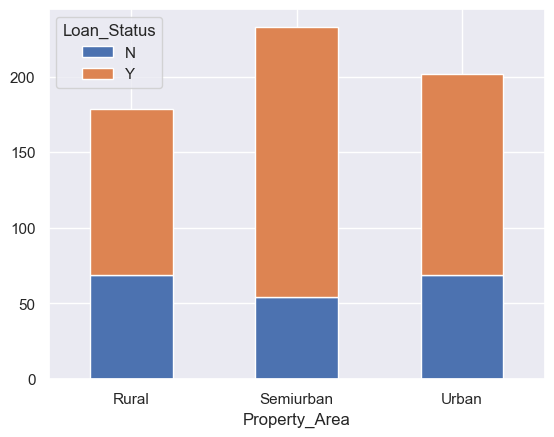

In [18]:
property_loan_status = pd.crosstab(loan_appr['Property_Area'], loan_appr['Loan_Status'])
property_loan_status.plot.bar(stacked = True, rot = 0)
plt.show()

In [19]:
pd.crosstab(loan_appr['Self_Employed'], loan_appr['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


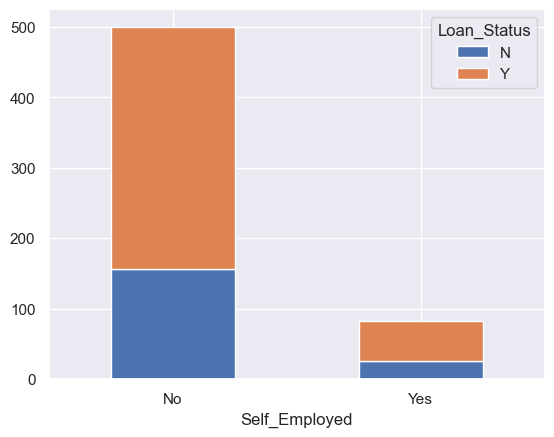

In [20]:
Self_Employed_loan_status = pd.crosstab(loan_appr['Self_Employed'], loan_appr['Loan_Status'])
Self_Employed_loan_status.plot.bar(stacked = True, rot = 0)
plt.show()

In [21]:
pd.crosstab(loan_appr['Dependents'], loan_appr['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


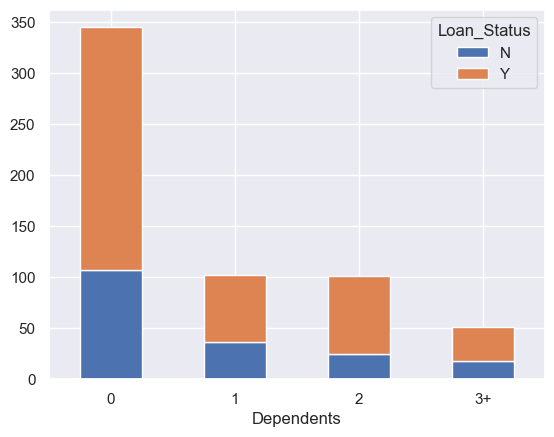

In [22]:
dependents_loan_status = pd.crosstab(loan_appr['Dependents'], loan_appr['Loan_Status'])
dependents_loan_status.plot.bar(stacked = True, rot = 0)
plt.show()

In [23]:
pd.crosstab(loan_appr['Loan_Amount_Term'], loan_appr['Loan_Status'])

Loan_Status,N,Y
Loan_Amount_Term,,
12.0,0,1
36.0,2,0
60.0,0,2
84.0,1,3
120.0,0,3
180.0,15,29
240.0,1,3
300.0,5,8
360.0,153,359


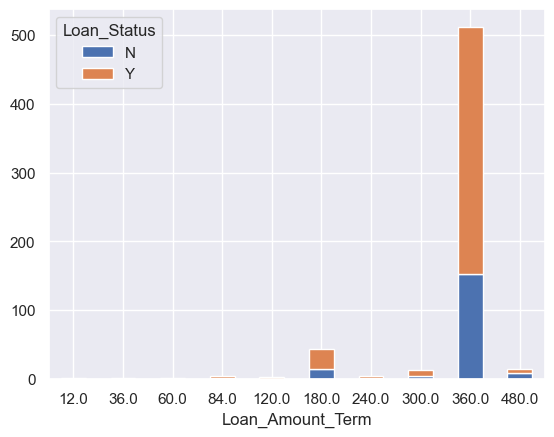

In [24]:
term_loan_status = pd.crosstab(loan_appr['Loan_Amount_Term'], loan_appr['Loan_Status'])
term_loan_status.plot.bar(stacked = True, rot = 0)
plt.show()

In [25]:
pd.crosstab(loan_appr['Credit_History'], loan_appr['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


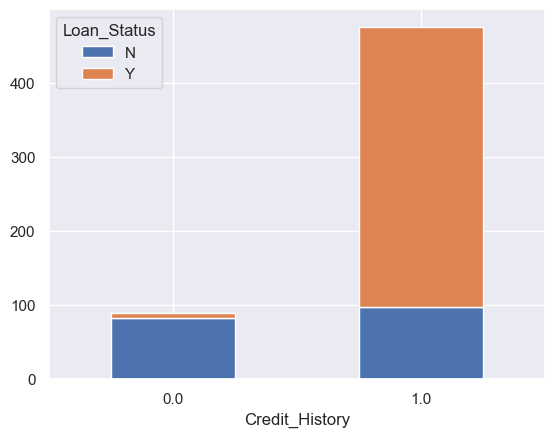

In [26]:
credit_history = pd.crosstab(loan_appr['Credit_History'], loan_appr['Loan_Status'])
credit_history.plot.bar(stacked = True, rot = 0)
plt.show()

the bar plot suggests that people with credit history as 1 are more likely to get their loans approved

## Numerical Variables Vs Loan Status

### Applicant Income vs Loan Status

In [27]:
pd.crosstab(loan_appr['ApplicantIncome'], loan_appr['Loan_Status'])

Loan_Status,N,Y
ApplicantIncome,,
150,1,0
210,0,1
416,1,0
645,0,1
674,0,1
...,...,...
39147,0,1
39999,0,1
51763,0,1


In [28]:
print(loan_appr.groupby('Loan_Status')['ApplicantIncome'].mean())

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


Loan_Status      N    Y
IncomeRange            
(0, 2500]       34   74
(2500, 5000]    99  216
(5000, 10000]   42   97
(10000, 20000]  13   27
(20000, 40000]   3    6
(40000, 81000]   1    2


<Axes: xlabel='IncomeRange'>

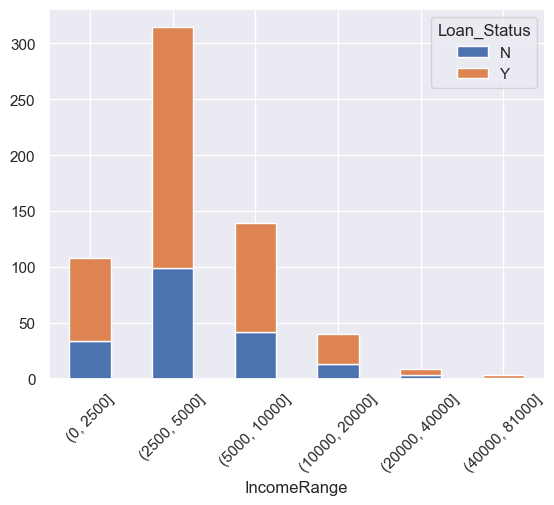

In [29]:
loan_appr['IncomeRange'] = pd.cut(loan_appr['ApplicantIncome'], bins = [0, 2500, 5000, 10000, 20000, 40000, 81000])
income_status = pd.crosstab(loan_appr['IncomeRange'], loan_appr['Loan_Status'])
print(income_status)
income_status.plot.bar(stacked = True, rot = 45)

The bar plot suggests, that the applicant income does not effect the loan approval process as much as anticipated, as we can notice that for every income range the loan approval and rejection is almost similar, suggesting that it is some other factor that determine's the loan approval

But, while applicant income is not a factor in loan approval, let's see if it plays any role in loan amount.

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

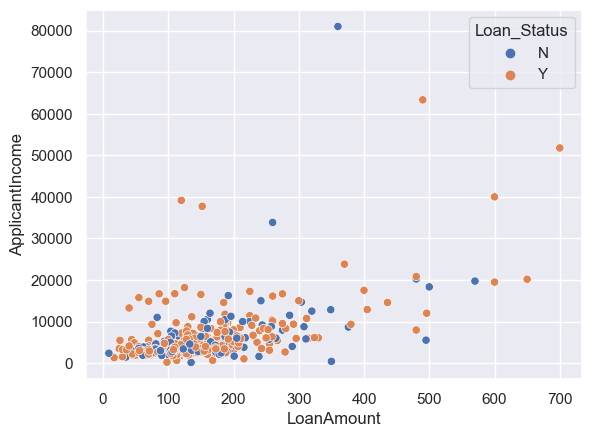

In [30]:
sns.scatterplot(data = loan_appr, x = 'LoanAmount', y = 'ApplicantIncome', hue = 'Loan_Status', hue_order = ['N', 'Y'])

The scatterplot suggests, that although the Applicant Income does not have any effect on the Loan Approval, it definately has an impact on the loan amount showing us a linear positive correlation trend, as seen by the scatterplot, that the higher the income of the applicant, the higher loan amount is approved for the applicant

### Applicant Total Income Vs Loan Status

In [31]:
loan_appr['total_income'] = loan_appr['ApplicantIncome'] + loan_appr['CoapplicantIncome']
print(loan_appr['total_income'].describe())
loan_appr['total_income_range'] = pd.cut(loan_appr['total_income'], bins = [0, 2500, 5000, 10000, 20000, 40000, 81000])
total_income_status = pd.crosstab(loan_appr['total_income_range'], loan_appr['Loan_Status'])
print(total_income_status)

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: total_income, dtype: float64
Loan_Status          N    Y
total_income_range         
(0, 2500]           14   10
(2500, 5000]        75  171
(5000, 10000]       74  183
(10000, 20000]      20   49
(20000, 40000]       7    6
(40000, 81000]       2    3


<Axes: xlabel='total_income_range'>

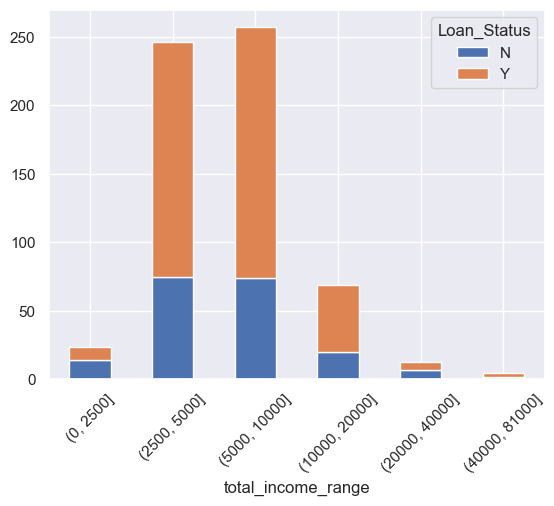

In [32]:
total_income_status.plot.bar(stacked = True, rot = 45)

This graph also does not directly suggest that having a higher income has an effect on loan approval 

### Loan Amount Vs. Loan Status

In [33]:
pd.crosstab(loan_appr['LoanAmount'], loan_appr['Loan_Status'])

Loan_Status,N,Y
LoanAmount,,
9.0,1,0
17.0,0,1
25.0,0,2
26.0,0,1
30.0,0,2
...,...,...
500.0,1,0
570.0,1,0
600.0,0,2


In [34]:
loan_appr['loan_amount_range'] = pd.cut(loan_appr['LoanAmount'], bins = [0, 25, 50, 100, 200, 400, 700])
pd.crosstab(loan_appr['loan_amount_range'], loan_appr['Loan_Status'])

Loan_Status,N,Y
loan_amount_range,,
"(0, 25]",1,3
"(25, 50]",3,16
"(50, 100]",43,88
"(100, 200]",103,255
"(200, 400]",27,39
"(400, 700]",4,10


<Axes: xlabel='loan_amount_range'>

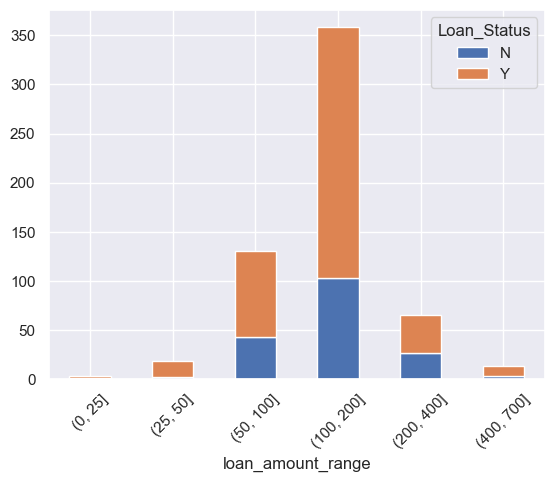

In [35]:
amount_status = pd.crosstab(loan_appr['loan_amount_range'], loan_appr['Loan_Status'])
amount_status.plot.bar(stacked = True, rot = 45)

The plot suggests that the proportion of approval rate for lower and average loan amounts, is higher compared to higher and very high loan amounts

In [36]:
loan_appr = loan_appr.drop(['total_income'], axis = 1)

In [37]:
correlation_matrix = loan_appr.corr() 
print(correlation_matrix)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  


/var/folders/xf/djdr51tx47d1mk2ynq3k0hl80000gn/T/ipykernel_30093/3411523848.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_appr.corr()


---
## Cleaning the Data

We will now clean the data, as it is inconsistent and lacking in certain areas, and contains some errors

In [38]:
loan_appr.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
IncomeRange            0
total_income_range     0
loan_amount_range     22
dtype: int64

we can observe that there are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one.

In [39]:
loan_appr_clean = loan_appr.dropna(axis = 0)

In [40]:
loan_appr_clean.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
IncomeRange           0
total_income_range    0
loan_amount_range     0
dtype: int64

In [41]:
loan_appr_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Loan_ID             480 non-null    object  
 1   Gender              480 non-null    object  
 2   Married             480 non-null    object  
 3   Dependents          480 non-null    object  
 4   Education           480 non-null    object  
 5   Self_Employed       480 non-null    object  
 6   ApplicantIncome     480 non-null    int64   
 7   CoapplicantIncome   480 non-null    float64 
 8   LoanAmount          480 non-null    float64 
 9   Loan_Amount_Term    480 non-null    float64 
 10  Credit_History      480 non-null    float64 
 11  Property_Area       480 non-null    object  
 12  Loan_Status         480 non-null    object  
 13  IncomeRange         480 non-null    category
 14  total_income_range  480 non-null    category
 15  loan_amount_range   480 non-null    cate

We will now clean the column names, to fit the Python snakecase

In [42]:
new_columns = []
for c in loan_appr_clean.columns:
    new_columns.append(c.lower())

loan_appr_clean.columns = new_columns
print(loan_appr_clean.columns)

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status',
       'incomerange', 'total_income_range', 'loan_amount_range'],
      dtype='object')


In [43]:
loan_appr_clean.columns = ['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status',
       'income_range', 'total_income_range', 'loan_amount_range']
print(loan_appr_clean.columns)

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicant_income', 'coapplicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status', 'income_range', 'total_income_range',
       'loan_amount_range'],
      dtype='object')


In [51]:
loan_appr_clean.describe(include = 'all')

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status,income_range,total_income_range,loan_amount_range,loan_amount_log
count,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480.000000,480,480,480,480,480,480.000000
unique,480,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2,6,6,6,NaN
top,LP001003,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y,"(2500, 5000]","(5000, 10000]","(100, 200]",NaN
freq,1,394,311,274,383,414,NaN,NaN,NaN,NaN,NaN,191,332,245,198,290,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5364.231250,1581.093583,144.735417,342.050000,0.854167,NaN,NaN,NaN,NaN,NaN,4.848336
std,NaN,NaN,NaN,NaN,NaN,NaN,5668.251251,2617.692267,80.508164,65.212401,0.353307,NaN,NaN,NaN,NaN,NaN,0.510329
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,36.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2.197225
25%,NaN,NaN,NaN,NaN,NaN,NaN,2898.750000,0.000000,100.000000,360.000000,1.000000,NaN,NaN,NaN,NaN,NaN,4.605170
50%,NaN,NaN,NaN,NaN,NaN,NaN,3859.000000,1084.500000,128.000000,360.000000,1.000000,NaN,NaN,NaN,NaN,NaN,4.852030
75%,NaN,NaN,NaN,NaN,NaN,NaN,5852.500000,2253.250000,170.000000,360.000000,1.000000,NaN,NaN,NaN,NaN,NaN,5.135798


In [54]:
print(loan_appr_clean.head())
print(loan_appr_clean.tail())

    loan_id gender married dependents     education self_employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   applicant_income  coapplicant_income  loan_amount  loan_amount_term  \
1              4583              1508.0        128.0             360.0   
2              3000                 0.0         66.0             360.0   
3              2583              2358.0        120.0             360.0   
4              6000                 0.0        141.0             360.0   
5              5417              4196.0        267.0             360.0   

   credit_history property_area loan_status   income_range total_income_range  \
1             1.0         Rural           N   (2500, 5000] 

## Cleaning Outliers

we saw earlier that some of the variables in the dataset contains outliers. due to these outliers our variables are right skewed, which is having a significant effect on the mean and standard deviation affercting our distribution.



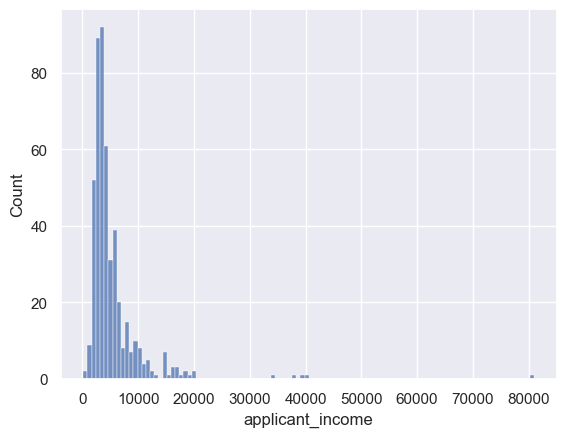

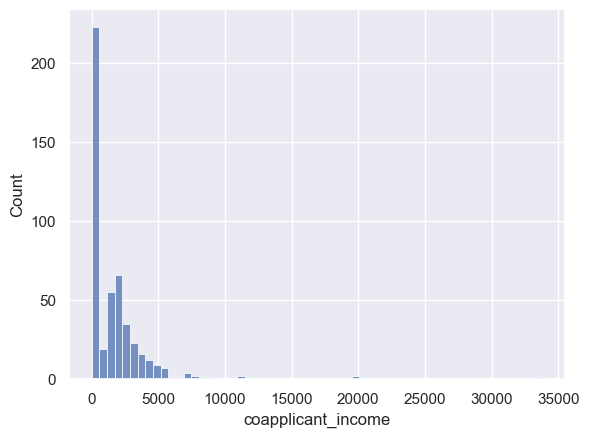

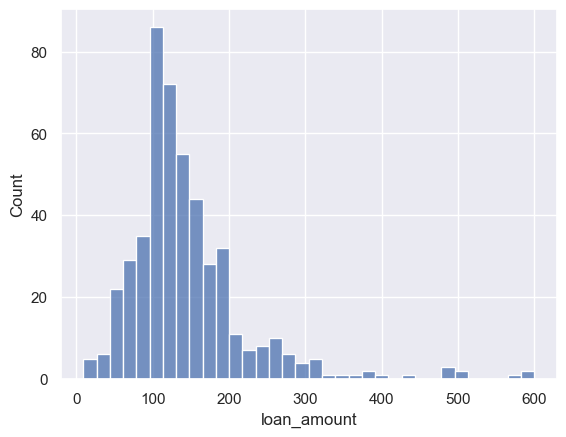

In [44]:
Numerical_clean = ['applicant_income', 'coapplicant_income', 'loan_amount']

sns.set_theme()
#Plotting all the numerical columns
for i, column in zip(range(1,4), Numerical_clean):
    sns.histplot(loan_appr_clean[column])
    plt.show()

To remove this skewness, one method we can use is the log transformation

In [65]:
loan_appr_clean.loc['loan_amount_log'] = np.log(loan_appr_clean['loan_amount'])
loan_appr_clean.loc['applincome_log'] = np.log(loan_appr_clean['applicant_income'])
loan_appr_clean.loc['coapplincome_log'] = np.log(loan_appr_clean['coapplicant_income'])

/Users/chinmay/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


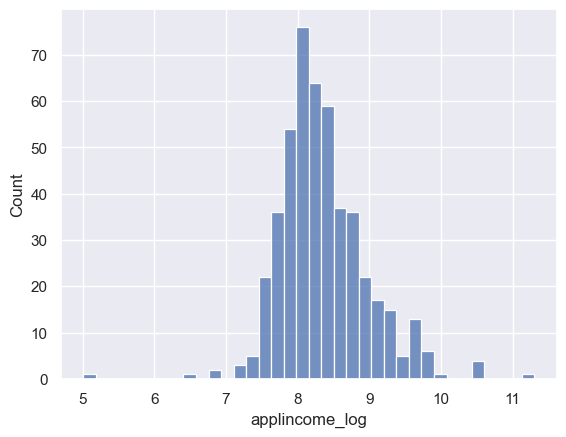

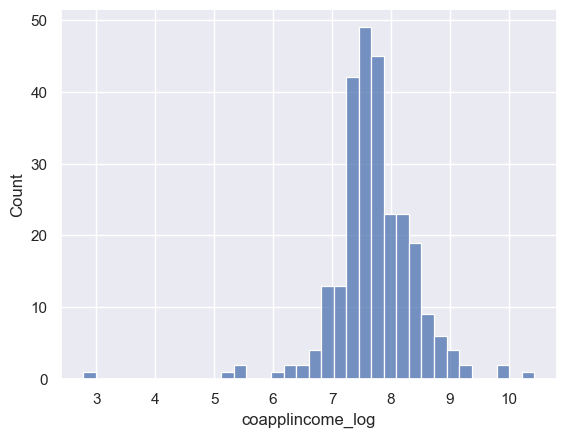

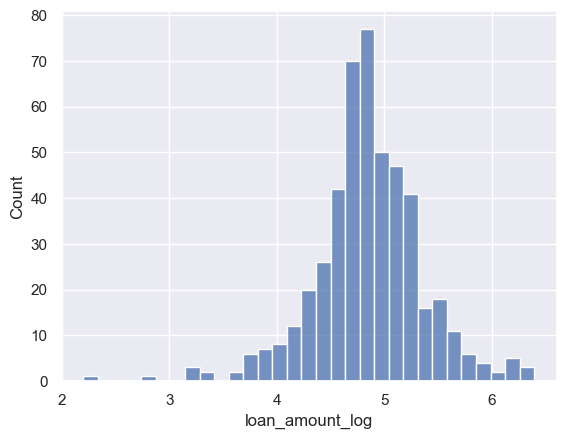

In [67]:
sns.histplot(loan_appr_clean['applincome_log'])
plt.show()
sns.histplot(loan_appr_clean['coapplincome_log'])
plt.show()
sns.histplot(loan_appr_clean['loan_amount_log'])
plt.show()


---
## Conclusion 

In this project, we conducted a comprehensive analysis of the `Loan+Approval+Prediction` dataset, aiming to gain insights into the factors influencing loan approval and explore potential predictions based on the analysis.

During the `Univariate Analysis` we examined each column/variable individually to understand their distributions and characteristics. The analysis revealed that the majority of applicants which has their loans approved had a `credit history`, were `male`, `educated`, `employed` and `married`, with varying range of income levels.

We further explored the relationships of the variables, and hypothesis we generated in the `Univariate Analysis` in the `Bivariate Analysis`.

Moving on to the `Bivariate Analysis` we explored the relationship of different variables vs the `Loan Approval Status`. Notably we discovered that altough we would generally expect a `higher income` to be a important factor in `loan approval`, the research suggests that it is not the case and that the `loan approval rate` was almost similar for `all income ranges`, but the `applicant income` did play a role in the `loan amount approved` - *the higher the income the higher the loan amount approved*.
Additionally we also observed a positive correlation between `credit history` and `loan approval`, indicating that a having a credit history significantly influenced the loan  decision

## Final Predictions

Based on the insights gained from our analysis, we can make the following predictions:
- **Income and Loan Approval**: even though the research does not directly support the hypothesis, that a higher income has an impact on the decision making process, we cannot disregard the human bias, a higher income gives a sense of security that the applicant in the future can return the loan. which is supported by the analysis we observed that a higher income approved a higher loan amount for the candidate.

- **Credit History and Loan Approval**: A positive credit history strongly influences the loan approval decision. Applicants with a credit history are more likely to secure a loan.

- **Marrital status, education and no.of dependents**: While not explicitly analyzed, during the univariate analysis, having a marrital status, showed a potential impact on loan approval, also being educated and having less no. of dependents definately are a factor in the loan approval decision.

### In conclusion,
while this analysis provides valuable insights into specific factors influencing loan approval, it is important to acknowledge the limitations and the need for further research. A comprehensive prediction requires consideration of additional factors, such as human bias and other relevant variables. Moreover, leveraging advanced machine learning models can improve the accuracy of loan approval predictions.
